# 第一讲：方程组的几何解释

我们从求解线性方程组来开始这门课，从一个普通的例子讲起：方程组有$2$个未知数，一共有$2$个方程，分别来看方程组的“行图像”和“列图像”。

有方程组$\begin{cases}2x&-y&=0\\-x&+2y&=3\end{cases}$，写作矩阵形式有$\begin{bmatrix}2&-1\\-1&2\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$，通常我们把第一个矩阵称为系数矩阵$A$，将第二个矩阵称为向量$x$，将第三个矩阵称为向量$b$，于是线性方程组可以表示为$Ax=b$。

我们来看行图像，即直角坐标系中的图像：

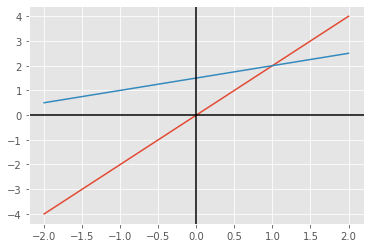

In [1]:
# %matplotlib inline #这个现在并不十分必要
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure()

#这里写的不是很清楚，我们更新一下
# x = [-2, 2, -2, 2]
# y = [-4, 4, 0.5, 2.5]
# plt.plot(x[:2], y[:2], x[2:], y[2:])

x_1=[-2,2]
y_1=[-4,4]
x_2=[-2,2]
y_2=[0.5,2.5]
plt.plot(x_1,y_1)
plt.plot(x_2,y_2)
plt.axhline(y=0, c='black')#横坐标horizon
plt.axvline(x=0, c='black')#纵坐标vertical


plt.show()

In [2]:
plt.close(fig)

上图是我们都很熟悉的直角坐标系中两直线相交的情况，接下来我们按列观察方程组$x\begin{bmatrix}2\\-1\end{bmatrix}+y\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$（我们把第一个向量称作$col_1$，第二个向量称作$col_2$，以表示第一列向量和第二列向量），要使得式子成立，需要第一个向量加上两倍的第二个向量，即$1\begin{bmatrix}2\\-1\end{bmatrix}+2\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$。

现在来看列图像，在二维平面上画出上面的列向量：

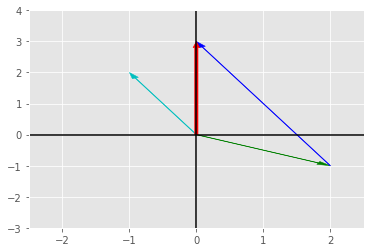

In [3]:
from functools import partial

fig = plt.figure()
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
ax = plt.gca()
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-3, 4)

arrow_vector = partial(plt.arrow, width=0.01, head_width=0.1, head_length=0.2, length_includes_head=True)

arrow_vector(0, 0, 2, -1, color='g')
arrow_vector(0, 0, -1, 2, color='c')
arrow_vector(2, -1, -2, 4, color='b')
arrow_vector(0, 0, 0, 3, width=0.05, color='r')

plt.draw()

In [4]:
plt.close(fig)

如图，绿向量$col_1$与蓝向量（两倍的蓝绿向量$col_2$）合成红向量$b$。

接着，我们继续观察$x\begin{bmatrix}2\\-1\end{bmatrix}+y\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$，$col_1,col_2$的某种线性组合得到了向量$b$，那么$col_1,col_2$的所有线性组合能够得到什么结果？它们将铺满整个平面。

下面进入三个未知数的方程组：$\begin{cases}2x&-y&&=0\\-x&+2y&-z&=-1\\&-3y&+4z&=4\end{cases}$，写作矩阵形式$A=\begin{bmatrix}2&-1&0\\-1&2&-1\\0&-3&4\end{bmatrix},\ b=\begin{bmatrix}0\\-1\\4\end{bmatrix}$。

在三维直角坐标系中，每一个方程将确定一个平面，而例子中的三个平面会相交于一点，这个点就是方程组的解。

同样的，将方程组写成列向量的线性组合，观察列图像：$x\begin{bmatrix}2\\-1\\0\end{bmatrix}+y\begin{bmatrix}-1\\2\\-3\end{bmatrix}+z\begin{bmatrix}0\\-1\\4\end{bmatrix}=\begin{bmatrix}0\\-1\\4\end{bmatrix}$。易知教授特意安排的例子中最后一个列向量恰巧等于等式右边的$b$向量，所以我们需要的线性组合为$x=0,y=0,z=1$。假设我们令$b=\begin{bmatrix}1\\1\\-3\end{bmatrix}$，则需要的线性组合为$x=1,y=1,z=0$。

我们并不能总是这么轻易的求出正确的线性组合，所以下一讲将介绍消元法——一种线性方程组的系统性解法。

现在，我们需要考虑，对于任意的$b$，是否都能求解$Ax=b$？用列向量线性组合的观点阐述就是，列向量的线性组合能否覆盖整个三维向量空间？对上面这个例子，答案是肯定的，这个例子中的$A$是我们喜欢的矩阵类型，但是对另一些矩阵，答案是否定的。那么在什么情况下，三个向量的线性组合得不到$b$？

——如果三个向量在同一个平面上，问题就出现了——那么他们的线性组合也一定都在这个平面上。举个例子，比如$col_3=col_1+col_2$，那么不管怎么组合，这三个向量的结果都逃不出这个平面，因此当$b$在平面内，方程组有解，而当$b$不在平面内，这三个列向量就无法构造出$b$。在后面的课程中，我们会了解到这种情形称为**奇异**、**矩阵不可逆**。

下面我们推广到九维空间，每个方程有九个未知数，共九个方程，此时已经无法从坐标图像中描述问题了，但是我们依然可以从求九维列向量线性组合的角度解决问题，仍然是上面的问题，是否总能得到$b$？当然这仍取决于这九个向量，如果我们取一些并不相互独立的向量，则答案是否定的，比如取了九列但其实只相当于八列，有一列毫无贡献（这一列是前面列的某种线性组合），则会有一部分$b$无法求得。

接下来介绍方程的矩阵形式$Ax=b$，这是一种乘法运算，举个例子，取$A=\begin{bmatrix}2&5\\1&3\end{bmatrix},\ x=\begin{bmatrix}1\\2\end{bmatrix}$，来看如何计算矩阵乘以向量：

* 我们依然使用列向量线性组合的方式，一次计算一列，$\begin{bmatrix}2&5\\1&3\end{bmatrix}\begin{bmatrix}1\\2\end{bmatrix}=1\begin{bmatrix}2\\1\end{bmatrix}+2\begin{bmatrix}5\\3\end{bmatrix}=\begin{bmatrix}12\\7\end{bmatrix}$
* 另一种方法，使用向量内积，矩阵第一行向量点乘$x$向量$\begin{bmatrix}2&5\end{bmatrix}\cdot\begin{bmatrix}1&2\end{bmatrix}^T=12,\ \begin{bmatrix}1&3\end{bmatrix}\cdot\begin{bmatrix}1&2\end{bmatrix}^T=7$。

教授建议使用第一种方法，将$Ax$看做$A$列向量的线性组合。